In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sns.set(font='Malgun Gothic',
        rc={'axes.unicode_minus':False},
        style='darkgrid')

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23660\2106068084.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [15]:
df=pd.read_csv('체육진흥기금 종합 지원실적지표_202205.csv',encoding='cp949')
df

,사업년도,프로그램명,단위사업명,단위세부사업명,지원단체명,내역사업명,세부사업명,예산액,실적금액,세출목명
0,2017,생활체육육성,생활체육 활성화,체육·문화예술사업의 지원,대한자전거연맹,문화체육사업지원,2017 One Bike One Korea Festival (자전거 화합 한마당),2.500000e+08,0.000000e+00,민간경상보조
1,2017,전문체육육성,대한체육회 지원,한국동계스포츠육성,대한체육회선수촌,동계스포츠 인프라 구축,동계스포츠 인프라구축,2.834000e+09,0.000000e+00,민간경상보조
2,2017,생활체육육성,생활체육 활성화,생활체육 정보제공 및 종목보급,사단법인 대한씨름협회,전통스포츠보급,민속씨름진흥(단오장사씨름대회 및 씨름의날 기념식),3.700000e+08,0.000000e+00,민간경상보조
3,2017,장애인체육육성,장애인체육 육성,장애인 체육활성화 지원,대한장애인체육회,장애인전문체육 지원,장애인은퇴선수 지원,2.230000e+08,0.000000e+00,민간경상보조
4,2017,장애인체육육성,장애인체육 육성,장애인 체육활성화 지원,사단법인 한국휠체어농구연맹,장애인체육법인단체 지원(한국휠체어농구연맹),휠체어농구리그제 지원,6.000000e+08,0.000000e+00,민간경상보조
...,...,...,...,...,...,...,...,...,...,...
4362,2022,생활체육육성,생활체육 활성화,생활체육 프로그램 지원,대한체육회,스포츠클럽 육성,스포츠클럽 육성,2.606700e+10,1.769972e+10,민간경상보조
4363,2022,생활체육육성,생활체육 활성화,체육·문화예술사업의 지원,대한장애인체육회,전문 인력 양성,2022 국제업무 전문인력 활동지원,3.000000e+08,9.866800e+07,민간경상보조
4364,2022,스포츠산업 육성,스포츠산업 활성화,스포츠산업활성화지원,서울올림픽기념국민체육진흥공단,첨단기술기반산업혁신,스포츠테크 프로젝트,5.000000e+09,4.000000e+09,민간경상보조
4365,2022,생활체육육성,생활체육 활성화,체육·문화예술사업의 지원,대한장애인체육회,기타 체육문화예술의 진흥,국제대회 포상금,4.050000e+09,4.050000e+09,민간경상보조


In [33]:
sports=df[(df['프로그램명']=='생활체육육성')&(df['단위사업명'].str.contains('체육'))]

In [42]:
pd.options.display.float_format = '{:.0f}'.format

In [54]:
sports_sum=sports.groupby(['사업년도','프로그램명'])['예산액','실적금액'].sum()
sports_sum

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23660\1907258210.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sports_sum=sports.groupby(['사업년도','프로그램명'])['예산액','실적금액'].sum()


,,예산액,실적금액
사업년도,프로그램명,,
2017,생활체육육성,133236235000,0
2018,생활체육육성,359860201000,365560200600
2019,생활체육육성,551870763000,551150273000
2020,생활체육육성,647998853000,646798853000
2021,생활체육육성,885122400001,868213809540
2022,생활체육육성,803127209000,445790393000


In [55]:
sports_sum=sports_sum.reset_index()
sports_sum.head()

,사업년도,프로그램명,예산액,실적금액
0,2017,생활체육육성,133236235000,0
1,2018,생활체육육성,359860201000,365560200600
2,2019,생활체육육성,551870763000,551150273000
3,2020,생활체육육성,647998853000,646798853000
4,2021,생활체육육성,885122400001,868213809540


<AxesSubplot:xlabel='사업년도', ylabel='실적금액'>

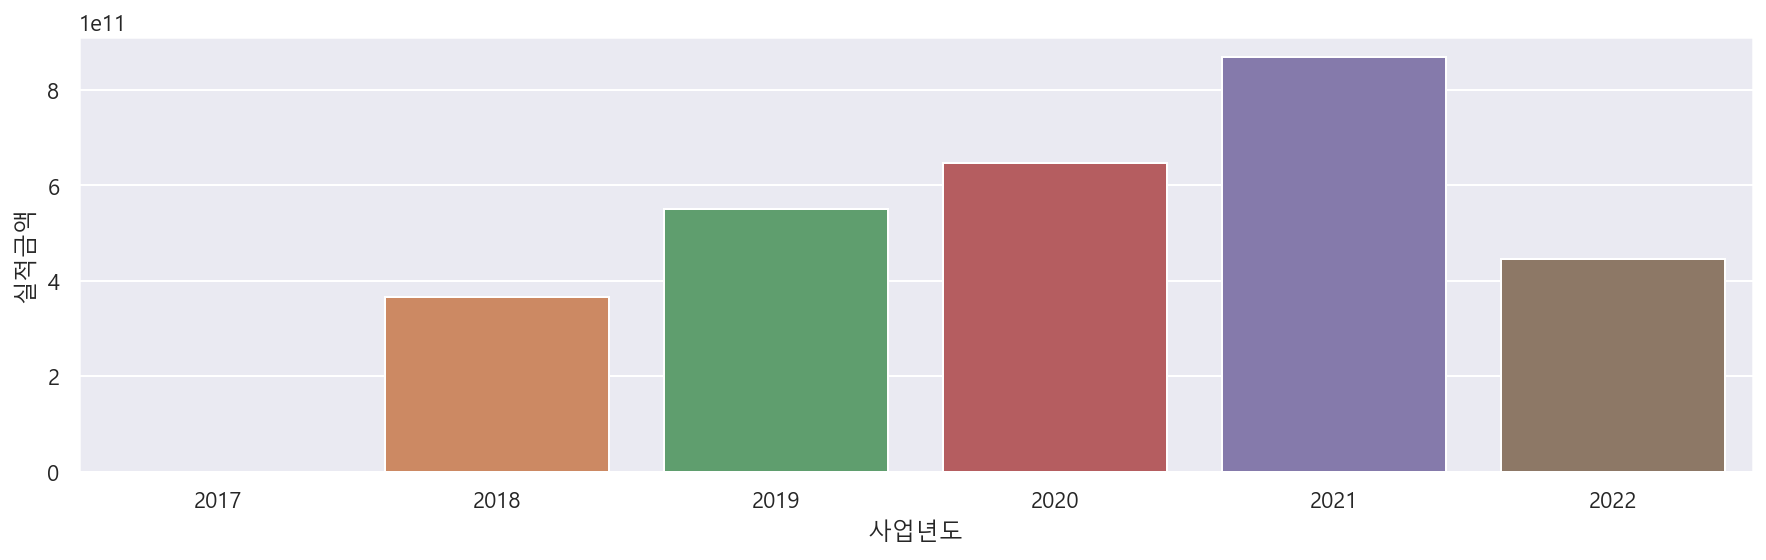

In [58]:
plt.figure(figsize=(15,4))
sns.barplot(data=sports_sum,x='사업년도',y='실적금액')